<a href="https://colab.research.google.com/github/sujayrittikar/DeepLearning/blob/master/DropoutLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, Y_train), (x_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


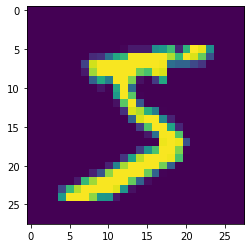

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

In [5]:
print("x train shape: ", x_train.shape)
print("Y train shape: ", Y_train.shape)
print("x test shape: ", x_test.shape)
print("Y test shape: ", Y_test.shape)

x train shape:  (60000, 28, 28)
Y train shape:  (60000,)
x test shape:  (10000, 28, 28)
Y test shape:  (10000,)


In [6]:
# Scaling x values
x_train = x_train/255.0
x_test = x_test/255.0

In [7]:
# Transforming x to represent 1D vectors for individual images
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

In [8]:
# Getting y one-hot encoded
Y_train = tf.keras.utils.to_categorical(Y_train)
Y_test = tf.keras.utils.to_categorical(Y_test)

In [9]:
# Building the deep neural network model with dropout layers
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(784, )))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer="sgd", loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [11]:
fitted = model.fit(x=x_train, y=Y_train, batch_size=10, epochs=10, validation_split=0.25)

Epoch 1/10
4500/4500 [==============================] - 12s 3ms/step - loss: 0.6105 - acc: 0.8117 - val_loss: 0.2538 - val_acc: 0.9257
Epoch 2/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.2973 - acc: 0.9128 - val_loss: 0.1852 - val_acc: 0.9446
Epoch 3/10
4500/4500 [==============================] - 11s 2ms/step - loss: 0.2285 - acc: 0.9320 - val_loss: 0.1573 - val_acc: 0.9529
Epoch 4/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.1935 - acc: 0.9434 - val_loss: 0.1361 - val_acc: 0.9591
Epoch 5/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.1701 - acc: 0.9500 - val_loss: 0.1253 - val_acc: 0.9625
Epoch 6/10
4500/4500 [==============================] - 9s 2ms/step - loss: 0.1533 - acc: 0.9547 - val_loss: 0.1174 - val_acc: 0.9657
Epoch 7/10
4500/4500 [==============================] - 10s 2ms/step - loss: 0.1366 - acc: 0.9595 - val_loss: 0.1090 - val_acc: 0.9681
Epoch 8/10
4500/4500 [==============================] - 

In [12]:
predictions = model.predict(x_test)

In [13]:
model.evaluate(x=x_test, y=Y_test, batch_size=10)

1000/1000 [==============================] - 1s 1ms/step - loss: 0.0865 - acc: 0.9742


[0.0865379124879837, 0.9742000102996826]

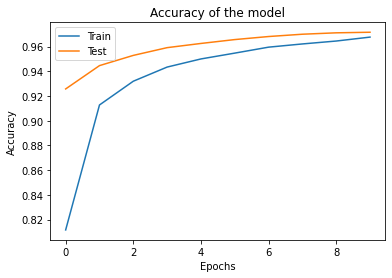

In [14]:
plt.plot(fitted.history['acc'])
plt.plot(fitted.history['val_acc'])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy of the model")
plt.legend(["Train", "Test"])
plt.show()

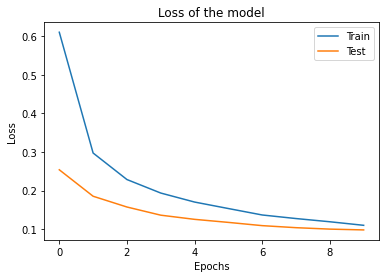

In [15]:
plt.plot(fitted.history['loss'])
plt.plot(fitted.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss of the model")
plt.legend(["Train", "Test"])
plt.show()